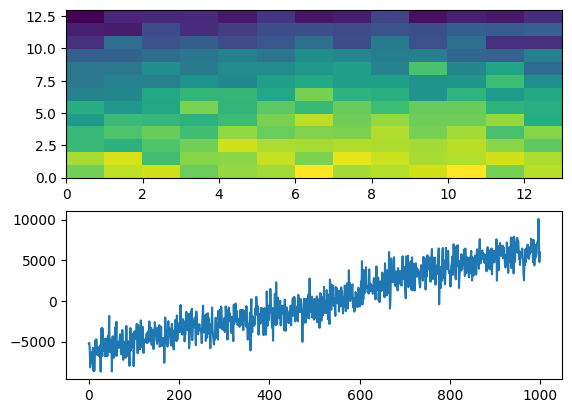

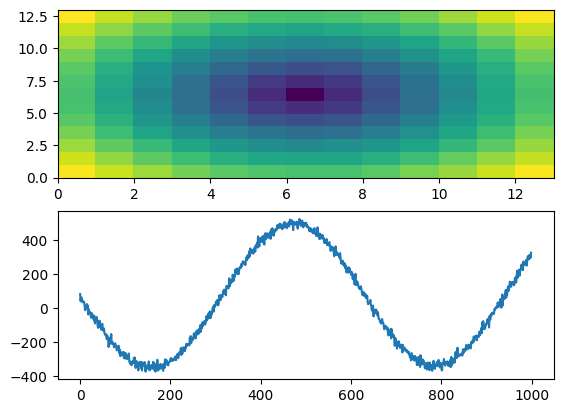

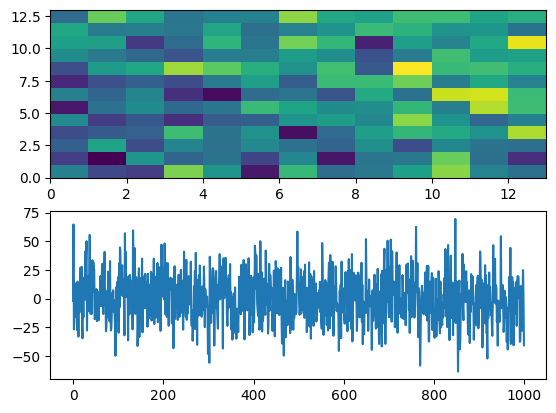

In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
    
def remove_mean_value(matrix):
    """Remove the mean value from each measurement type, such that we form a new vector S’
    which represents the anomalies (differences between the original values and the mean). """
    m = np.mean(matrix, axis=0)
    return matrix-m
    
def calc_cov(matrix):
    #cov_matrix = np.cov(matrix, bias=True, rowvar=0)
    cov_matrix = (1/(len(matrix)-1))*np.matmul(matrix.T,matrix)
    return cov_matrix

def eigenvector_decomp(cov_matrix):
    """Calculate an eigenvector decomposition of the covariance matrix"""
    # Calculate Eigenvalues and Eigenmatrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    return eigenvalues, eigenvectors

def Principal_Component_Analysis(X):
    anomaly = remove_mean_value(X)
    cov_matrix = calc_cov(anomaly)
    eigenvalues, eigenvectors = eigenvector_decomp(cov_matrix)
    return [eigenvalues,eigenvectors,anomaly,cov_matrix]

x=np.arange(0,6.5,0.5)
y=x
# create a two dimnesional grid from the vectors (1-D arrays) x and y
[X,Y]=np.meshgrid(x,y)

# produce three matrices (H1, H2, H3) representing using the 
H1=100.0*(1.2-0.35*np.sqrt((X-3)*(X-3)+(Y-3)*(Y-3)))
H2=1022.8-3.6*Y
H3=1001.2+3.6*X


# flatten the spatial patterns into one dimension for later use
Hflat1=np.reshape(H1,(169,1))
Hflat2=np.reshape(H2,(169,1))
Hflat3=np.reshape(H3,(169,1))


# define a set of time series 
W2=np.arange(0.0,1.0,1.0E-03)
W1=np.sin(10.0*W2)
W3=np.random.randn(W1.size)*0.1

# form the time-space matrix (2d matrix) which is madeup a combination of the three
# spatial patterns. This matrix will then be examined using PCA
X=np.outer(W1,Hflat1)+np.outer(W2,Hflat2)+np.outer(W3,Hflat3)

# add some random noise to show potential benefits of PCA

#np.random.seed(100)  # setting seed for random number generator - this ensures that the smae set of random numbers are used consistently
Hrand=15.0*np.random.randn(X.shape[0],X.shape[1])  #simulates noise
X=X+Hrand # adds noise to the artificial dataset

[eigen_values,eigen_vectors,anomaly,covariance]=Principal_Component_Analysis(X)

PC=np.matmul(anomaly,eigen_vectors)



for j in [-1,-2,-3]:     # plot the last three values in the PCA analysis - note ordering
    plt.figure()
    plt.subplot(2,1,1)
    plt.pcolor(np.reshape(eigen_vectors[:,j],(13,13)))
    plt.subplot(2,1,2)
    plt.plot(PC[:,j])
    plt.savefig('PCA_Test_%04d.png' %j)  # ensures that ordering is nice
    


# TASK 2

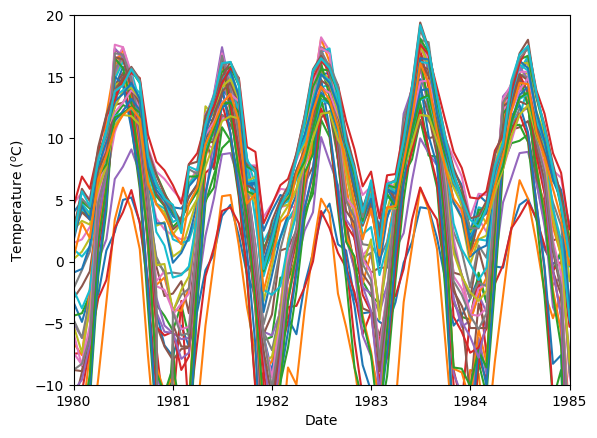

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import glob


def read_lat_lon_metadata(filename):
    input_file=open(filename)
    for line in input_file:
        if(line[0:4]=='Lat='):
            lat=float(line[5:])
        if(line[0:5]=='Long='):
            lon=float(line[6:])      
    return lat,lon

def datetime_array_create(start_year,end_year):
    # create a datetime array using start and end year information
    start_month=1
    start_day=1
    start_hour=0
    start_minute=0
    start_sec=0
    base=datetime.datetime(start_year,start_month,start_day,start_hour,start_minute,start_sec,0)
    date_array=np.array([base+relativedelta(months=i) for i in range(int((end_year-start_year)*12))])
    return date_array


def read_station_data_file(filename):
    #this code reads the formatted station data file
    # input= filename
    # output is latitude,longitude, datetime_array and temperature_array
    tmp=np.loadtxt(filename,skiprows=22)  #skipping metadata information to get to temperature data
    year_array=tmp[:,0]
    temperature=tmp[:,1:]
    temperature_array=np.reshape(temperature,(temperature.shape[0]*temperature.shape[1],1))
    datetime_array=datetime_array_create(int(year_array[0]),int(year_array[-1])+1)
    [lat,lon]=read_lat_lon_metadata(filename)
    return lat,lon, datetime_array,temperature_array

def read_folder(foldername):
    #Reads data from all folders
    files = glob.glob(foldername+'/**/**', 
                   recursive = False)
    for file in files[0:50]:
        lat, lon, datetime_array,temperature_array = read_station_data_file(file) 
        lat_meta, lon_meta = read_lat_lon_metadata(file)  
        plt.plot(datetime_array,temperature_array)
        plt.xlim(datetime.datetime(1980,1,1,0,0,0),datetime.datetime(1985,1,1,0,0,0))
        plt.ylim(-10.0,20.0)
        plt.xlabel('Date')
        plt.ylabel('Temperature ($^o$C)')
        

#filename='DAex5_data1.dat'
foldername = 'DATA_INTRODUCTION2/Station_data' 
read_folder(foldername)



# Task 3

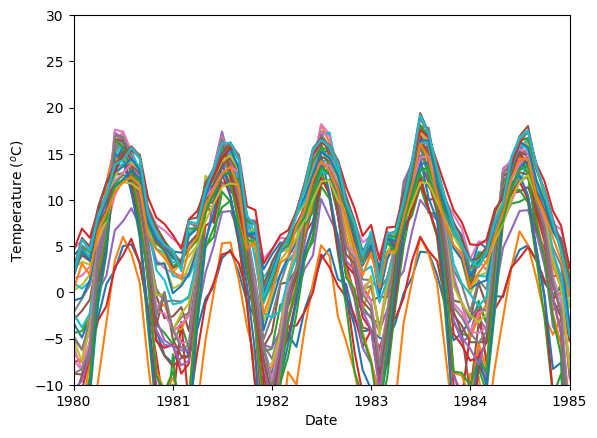

In [10]:
def read_lat_lon_metadata(filename):
    input_file=open(filename)
    for line in input_file:
        if(line[0:4]=='Lat='):
            lat=float(line[5:])
        if(line[0:5]=='Long='):
            lon=float(line[6:])   
    return lat,lon

def datetime_array_create(start_year,end_year):
    # create a datetime array using start and end year information
    start_month=1
    start_day=1
    start_hour=0
    start_minute=0
    start_sec=0
    base=datetime.datetime(start_year,start_month,start_day,start_hour,start_minute,start_sec,0)
    date_array=np.array([base+relativedelta(months=i) for i in range(int((end_year-start_year)*12))])
    return date_array


def read_station_data_file(filename):
    #this code reads the formatted station data file
    # input= filename
    # output is latitude,longitude, datetime_array and temperature_array
    tmp=np.loadtxt(filename,skiprows=22)  #skipping metadata information to get to temperature data
    year_array=tmp[:,0]
    temperature=tmp[:,1:]
    temperature_array=np.reshape(temperature,(temperature.shape[0]*temperature.shape[1],1))
    datetime_array=datetime_array_create(int(year_array[0]),int(year_array[-1])+1)
    [lat,lon]=read_lat_lon_metadata(filename)
    return lat,lon, datetime_array,temperature_array

def save_file(temperature_array, file):
    with open(file+'.dat', 'wb') as f:
        np.save(f, temperature_array)

def read_folder(foldername):
    #Reads data from all folders
    files = glob.glob(foldername+'/**/**', 
                   recursive = False)
    for file in files[0:50]:
        lat, lon, datetime_array,temperature_array = read_station_data_file(file) 
        lat_meta, lon_meta = read_lat_lon_metadata(file) 
        error = np.where(temperature_array == -99.0)
        temperature_array.flags.writeable = True
        if error[0].any():
            for index in range(0, len(error[0])):
                temperature_array[temperature_array == -99.0] = 0
        plt.plot(datetime_array,temperature_array)
        plt.xlim(datetime.datetime(1980,1,1,0,0,0),datetime.datetime(1985,1,1,0,0,0))
        plt.ylim(-10.0,30.0)
        plt.xlabel('Date')
        plt.ylabel('Temperature ($^o$C)')
        
foldername = 'DATA_INTRODUCTION2/Station_data' 
read_folder(foldername)

# Task 4

(612, 1) (1, 1)
1697


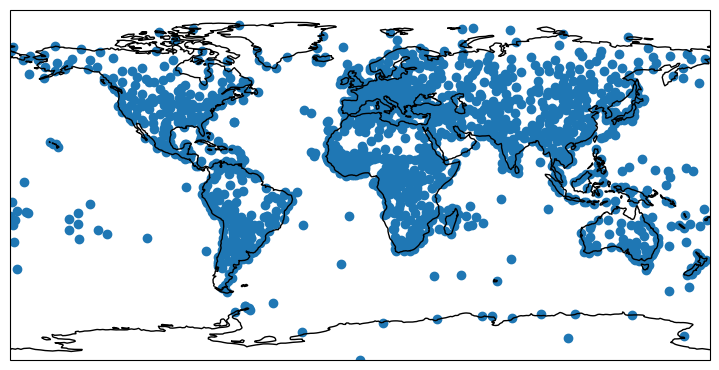

In [11]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import cartopy.crs as crs
    
def remove_mean_value(matrix):
    """Remove the mean value from each measurement type, such that we form a new vector S’
    which represents the anomalies (differences between the original values and the mean). """
    m = np.mean(matrix, axis=0)
    return matrix-m
    
def calc_cov(matrix):
    #cov_matrix = np.cov(matrix, bias=True, rowvar=0)
    cov_matrix = (1/(len(matrix)-1))*np.matmul(matrix.T,matrix)
    return cov_matrix

def eigenvector_decomp(cov_matrix):
    """Calculate an eigenvector decomposition of the covariance matrix"""
    # Calculate Eigenvalues and Eigenmatrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    return eigenvalues, eigenvectors

def Principal_Component_Analysis(X):
    anomaly = remove_mean_value(X)
    cov_matrix = calc_cov(anomaly)
    eigenvalues, eigenvectors = eigenvector_decomp(cov_matrix)
    return [eigenvalues,eigenvectors,anomaly,cov_matrix]


import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import glob
import cartopy.crs as crs


def read_lat_lon_metadata(filename):
    input_file=open(filename)
    for line in input_file:
        if(line[0:4]=='Lat='):
            lat=float(line[5:])
        if(line[0:5]=='Long='):
            lon=float(line[6:])   
    return lat,lon

def datetime_array_create(start_year,end_year):
    # create a datetime array using start and end year information
    start_month=1
    start_day=1
    start_hour=0
    start_minute=0
    start_sec=0
    base=datetime.datetime(start_year,start_month,start_day,start_hour,start_minute,start_sec,0)
    date_array=np.array([base+relativedelta(months=i) for i in range(int((end_year-start_year)*12))])
    return date_array


def read_station_data_file(filename):
    #this code reads the formatted station data file
    # input= filename
    # output is latitude,longitude, datetime_array and temperature_array
    tmp=np.loadtxt(filename,skiprows=22)  #skipping metadata information to get to temperature data
    year_array=tmp[:,0]
    temperature=tmp[:,1:]
    temperature_array=np.reshape(temperature,(temperature.shape[0]*temperature.shape[1],1))
    datetime_array=datetime_array_create(int(year_array[0]),int(year_array[-1])+1)
    [lat,lon]=read_lat_lon_metadata(filename)
    return lat,lon, datetime_array,temperature_array

def read_folder(foldername):
    #Reads data from all folders
    files = glob.glob(foldername+'/**/**', 
                   recursive = False)
    for file in files:
        lat, lon, datetime_array,temperature_array = read_station_data_file(file) 
        lat_meta, lon_meta = read_lat_lon_metadata(file) 
        error = np.where(temperature_array == -99.0)
        temperature_array.flags.writeable = True
        if error[0].any():
            for index in range(0, len(error[0])):
                temperature_array[temperature_array == -99.0] = 0
        lats.append(lat)
        lons.append(-lon)
    return lat, lon, datetime_array,temperature_array

lats = []
lons = []

foldername = 'DATA_INTRODUCTION2/Station_data' 
[lat,lon, datetime_array,temperature_array]=read_folder(foldername)

[eigen_values,eigen_vectors,anomaly,covariance]=Principal_Component_Analysis(temperature_array)

print(anomaly.shape, eigen_vectors.shape)
#PC=np.matmul(anomaly,eigen_vectors)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,1,1, projection=crs.PlateCarree())
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.scatter(lons, lats)
print(len(lons))

    


# Task 5

In [ ]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import cartopy.crs as crs
    
def remove_mean_value(matrix):
    """Remove the mean value from each measurement type, such that we form a new vector S’
    which represents the anomalies (differences between the original values and the mean). """
    m = np.mean(matrix)
    return matrix-m
    
def calc_cov(matrix):
    cov_matrix = np.cov(matrix, bias=True, rowvar=0)
    return cov_matrix

def eigenvector_decomp(cov_matrix):
    """Calculate an eigenvector decomposition of the covariance matrix"""
    # Calculate Eigenvalues and Eigenmatrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors

def Principal_Component_Analysis(X):
    anomaly = remove_mean_value(X)
    cov_matrix = calc_cov(anomaly)
    eigenvalues, eigenvectors = eigenvector_decomp(cov_matrix)
    return [eigenvalues,eigenvectors,anomaly,cov_matrix]

# -*- coding: utf-8 -*-
"""
Created on Sat Jul 22 16:45:56 2023

@author: ajm226
"""
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import glob


def read_lat_lon_metadata(filename):
    input_file=open(filename)
    for line in input_file:
        if(line[0:4]=='Lat='):
            lat=float(line[5:])
        if(line[0:5]=='Long='):
            lon=float(line[6:])      
    return lat,lon

def datetime_array_create(start_year,end_year):
    # create a datetime array using start and end year information
    start_month=1
    start_day=1
    start_hour=0
    start_minute=0
    start_sec=0
    base=datetime.datetime(start_year,start_month,start_day,start_hour,start_minute,start_sec,0)
    date_array=np.array([base+relativedelta(months=i) for i in range(int((end_year-start_year)*12))])
    return date_array


def read_station_data_file(filename):
    #this code reads the formatted station data file
    # input= filename
    # output is latitude,longitude, datetime_array and temperature_array
    tmp=np.loadtxt(filename,skiprows=22)  #skipping metadata information to get to temperature data
    year_array=tmp[:,0]
    temperature=tmp[:,1:]
    temperature_array=np.reshape(temperature,(temperature.shape[0]*temperature.shape[1],1))
    datetime_array=datetime_array_create(int(year_array[0]),int(year_array[-1])+1)
    [lat,lon]=read_lat_lon_metadata(filename)
    return lat,lon, datetime_array,temperature_array

def read_folder(foldername):
    #Reads data from all folders
    files = glob.glob(foldername+'/**/**', 
                   recursive = False)
    lats = []
    lons = []
    for file in files[0:30]:
        lat, lon, datetime_array,temperature_array = read_station_data_file(file) 
        lat_meta, lon_meta = read_lat_lon_metadata(file) 
        lats.append(lat*8)
        lons.append(lon*8)
        #ax.scatter(lat,lon)
    return lats, lons, datetime_array,temperature_array
        

foldername = 'DATA_INTRODUCTION2/Station_data' 
[lats,lons, datetime_array,temperature_array]=read_folder(foldername)

[eigen_values,eigen_vectors,anomaly,covariance]=Principal_Component_Analysis(X)

PC=np.matmul(anomaly,eigen_vectors)

    
